# Proyek Analisis Data: E-Commerce
- Kelompok : 5
- Anggota : </br>
10123187 - Achmad Rizqi Ramadhan</br>
10123184 - Muhammad Reza Pahlevi</br>
10123176 - Naufal Rafi</br>
10123191 - Faris Drajat M.</br>
10123174 - Bastian Van Crush</br>
10123207 - Dani Andi Hendriansyah</br>

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : <br>
Bagaimana distribusi geografis pelanggan berdasarkan negara bagian dan kota di dunia? Dimanakah tingkat konsentrasi tertinggi pelanggan berada? - 10123187 - Achmad Rizqi Ramadhan

- Pertanyaan 2 : <br>
Bagaimana tren rata-rata harga produk per bulan? Apakah ada pola kenaikan atau penurunan harga dalam periode tertentu? - 10123207 - Dani Andi Hendriansyah

- Pertanyaan 3 : <br>
Bagaimana distribusi score ulasan pelanggan, dan apa yang dapat disimpulkan tentang tingkat kepuasan keseluruhan? - 10123191 - Faris Drajat M.

- Pertanyaan 4 : <br>
Bagaimana distribusi Status Pesanan, berapa persentase order dengan status delivered ? - 10123184 - M. Reza Pahlevi

- Pertanyaan 5 : <br>
Pelanggan mana yang melakukan pembelian berulang, dan apakah pola ini menunjukkan loyalitas pelanggan di negara bagian tertentu ? - 10123174 - Bastian Van Crush

- Pertanyaan 6 : <br>
Berapa proporsi ulasan positif, negatif, dan netral dari total ulasan? - 10123176 - Naufal Rafi

## Menyiapkan semua library yang dibuthkan

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import folium
from folium.plugins import HeatMap
import numpy as np

## Data Wrangling

### Gathering Data

#### Data Geolokasi

In [3]:
df_geolokasi = pd.read_csv('DataSets/geolocation_dataset.csv')
df_geolokasi.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
df_geolokasi.tail()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS
1000162,99950,-28.070104,-52.018658,tapejara,RS


#### Data Customer

In [5]:
df_customer = pd.read_csv('DataSets/customers_dataset.csv')
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
df_customer.tail()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


#### Data Review

In [7]:
df_review = pd.read_csv('DataSets/order_reviews_dataset.csv')
df_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
df_review.tail()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49


#### Data Order

In [9]:
df_order = pd.read_csv('DataSets/orders_dataset.csv')
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
df_order.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


### Assessing Data

#### Data Geolokasi

In [11]:
# Cek info dari dataframe
df_geolokasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [12]:
df_geolokasi.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [13]:
df_geolokasi.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [14]:
print('Data Duplikasi =', df_geolokasi.duplicated().sum())

Data Duplikasi = 261831


Insight : <br>
dalam data geolokasi tidak ditemukan adanya data yang kosong, dan duplikasi menyatakan adanya customer yang membeli lebih dari satu kali di satu tempat sehingga tidak diperlukan cleaning karena data ini nantinya akan digunakan untuk melihat konsentrasi lokasi pembeli.

#### Data Customer

In [15]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [16]:
df_customer.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [17]:
df_customer.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [18]:
print('Data Duplikasi =', df_customer.duplicated().sum())

Data Duplikasi = 0


Insight : <br>
dalam data customer tidak ditemukan adanya data yang kosong dan terduplikasi, sehingga tidak perlu dilakukan cleaning

#### Data Review

In [19]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [20]:
df_review.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [21]:
df_review.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [22]:
print('Data Duplikasi =', df_review.duplicated().sum())

Data Duplikasi = 0


Insight :<br>
Terlihat bahwa terdapat beberapa hal yang harus dilakukan sebelum data di proses yaitu :<br>
- review_creation_date dan review_answer_timestamp seharusnya bertipe datetime
- terdapat banyak data kosong untuk review_comment_title dan review_comment_message

#### Data Order

In [23]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [24]:
df_order.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [25]:
df_order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [26]:
print('Data Duplikasi =', df_order.duplicated().sum())

Data Duplikasi = 0


Insight : <br>
- order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date seharusnya date time
- terdapat data yang kosong yang semuanya merupakan data waktu atau tanggal. Data tersebut akan dibiarkan kosong karena memang seharusnya kosong. seperti contoh :
untuk status order Cancelled maka order_delivered_customer_date akan kosong karena tidak ada pengiriman.

### Cleaning Data

In [27]:
# Cleaning data review
# Mengubah semua data kosong / Nan menjadi string kosong ""
df_review = df_review.fillna("")
df_review.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Data review customer sudah tidak memiliki value Nan

In [28]:
# Mengubah tipedata dari review_creation_date dan review_answer_timestamp menjadi datetime
df_review['review_creation_date'] = pd.to_datetime(df_review['review_creation_date'])
df_review['review_answer_timestamp'] = pd.to_datetime(df_review['review_answer_timestamp'])
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [29]:
# Mengubah data object dengan datetime
df_order['order_delivered_carrier_date'] = pd.to_datetime(df_order['order_delivered_carrier_date'])
df_order['order_delivered_customer_date'] = pd.to_datetime(df_order['order_delivered_customer_date'])
df_order['order_estimated_delivery_date'] = pd.to_datetime(df_order['order_estimated_delivery_date'])
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(5)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)

### Explore ...

In [30]:
# Grouping kota berdasarkan state untuk melihat kota mana berada di state apa
city_state_df = df_geolokasi.groupby('geolocation_state')['geolocation_city'].unique().apply(list).reset_index()

# Printing
for index,row in city_state_df.iterrows():
  print(f"{row['geolocation_state']} : \n{', '.join(row['geolocation_city'])}")
  print()

AC : 
sao paulo, rio de janeiro, sena madureira, rio branco, feijo, senador guiomard, cruzeiro do sul, xapuri, feijó, manoel urbano, santa rosa do purus, placido de castro, tarauaca, assis brasil, mâncio lima, mancio lima, tarauacá, porto walter, brasileia, campinas, rodrigues alves, brasiléia, acrelandia, plácido de castro, epitaciolândia, bujari, marechal thaumaturgo, epitaciolandia, porto acre, capixaba, jordão, jordao, acrelândia, rio bracnco

AL : 
maceio, maceió, maceia³, barra de sao miguel, rio largo, marechal deodoro, pilar, satuba, santa luzia do norte, barra de são miguel, coqueiro seco, coruripe, sao sebastiao, feliz deserto, teotonio vilela, junqueiro, penedo, igreja nova, sao miguel dos campos, luziapolis, piacabucu, jequia da praia, roteiro, teotônio vilela, campo alegre, piaçabuçu, porto real do colegio, são miguel dos campos, poxim, limoeiro de anadia, são sebastião, arapiraca, feira grande, craibas, lagoa da canoa, coite do noia, traipu, girau do ponciano, campo grand

In [31]:
# Menyimpan kepanjangan setiap state dalam dictionary
state_mapping = {
    'SP': 'São Paulo',
    'RN': 'Rio Grande do Norte',
    'AC': 'Acre',
    'RJ': 'Rio de Janeiro',
    'ES': 'Espírito Santo',
    'MG': 'Minas Gerais',
    'BA': 'Bahia',
    'SE': 'Sergipe',
    'PE': 'Pernambuco',
    'AL': 'Alagoas',
    'PB': 'Paraíba',
    'CE': 'Ceará',
    'PI': 'Piauí',
    'MA': 'Maranhão',
    'PA': 'Pará',
    'AP': 'Amapá',
    'AM': 'Amazonas',
    'RR': 'Roraima',
    'DF': 'Distrito Federal',
    'GO': 'Goiás',
    'RO': 'Rondônia',
    'TO': 'Tocantins',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'RS': 'Rio Grande do Sul',
    'PR': 'Paraná',
    'SC': 'Santa Catarina'
}

state_mapping

{'SP': 'São Paulo',
 'RN': 'Rio Grande do Norte',
 'AC': 'Acre',
 'RJ': 'Rio de Janeiro',
 'ES': 'Espírito Santo',
 'MG': 'Minas Gerais',
 'BA': 'Bahia',
 'SE': 'Sergipe',
 'PE': 'Pernambuco',
 'AL': 'Alagoas',
 'PB': 'Paraíba',
 'CE': 'Ceará',
 'PI': 'Piauí',
 'MA': 'Maranhão',
 'PA': 'Pará',
 'AP': 'Amapá',
 'AM': 'Amazonas',
 'RR': 'Roraima',
 'DF': 'Distrito Federal',
 'GO': 'Goiás',
 'RO': 'Rondônia',
 'TO': 'Tocantins',
 'MT': 'Mato Grosso',
 'MS': 'Mato Grosso do Sul',
 'RS': 'Rio Grande do Sul',
 'PR': 'Paraná',
 'SC': 'Santa Catarina'}

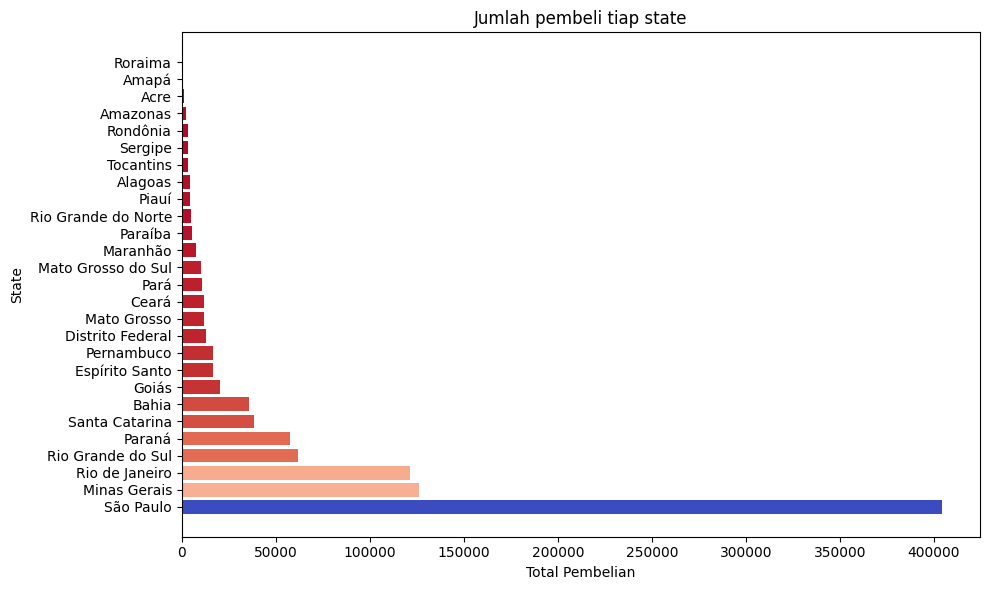

In [32]:
# Mendapatkan total pembelian tiap state
data = df_geolokasi['geolocation_state'].value_counts()

# Mendapatkan urutan state sesuai dengan data
state_order = data.index

# Mendapatkan nama lengkap state berdasarkan urutan dan state_mapping
full_state_names = [state_mapping[state] for state in state_order]

# Normalisasi data menjadi 0-1 untuk colormapping
normalized_data = (data.values - np.min(data.values)) / (np.max(data.values) - np.min(data.values))

# Membuat a colormap
colormap = plt.get_cmap('coolwarm_r')

# Plotting dengan barh dan colormapping
plt.figure(figsize=(10, 6)) # Mengatur agar terdapat jarak antar data
plt.barh(
    full_state_names,
    data.values,
    color=colormap(normalized_data)
)
plt.title('Jumlah pembeli tiap state')
plt.ylabel('State')
plt.xlabel('Total Pembelian')
plt.tight_layout()
plt.show()

Insight : <br>
Dari data diagram terlihat bahwa daerah dimana total pembelian paling banyak terdapat di negara bagian Sao Paulo yang memiliki angka lebih dari 2 kali Minas Gerais.

In [33]:
df_customer_group_state = df_customer.groupby('customer_state')['customer_unique_id'].count()
df_customer_group_state = df_customer_group_state.sort_values(ascending=False)
df_customer_group_state

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_unique_id, dtype: int64

<BarContainer object of 27 artists>

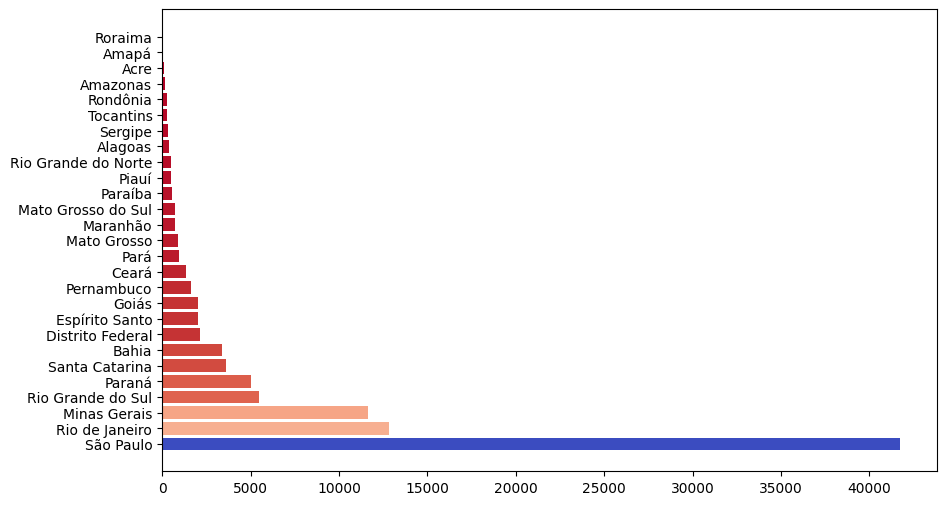

In [34]:
# Mendapatkan urutan state sesuai dengan data
state_order = df_customer_group_state.index

# Mendapatkan nama lengkap state berdasarkan urutan dan state_mapping
full_state_names = [state_mapping[state] for state in state_order]

# Normalisasi data menjadi 0-1 untuk colormapping
normalized_data = (df_customer_group_state.values - np.min(df_customer_group_state.values)) / (np.max(df_customer_group_state.values) - np.min(df_customer_group_state.values))

# Membuat a colormap
colormap = plt.get_cmap('coolwarm_r')

# Plotting dengan barh dan colormapping
plt.figure(figsize=(10, 6)) # Mengatur agar terdapat jarak antar data
plt.barh(
    full_state_names,
    df_customer_group_state.values,
    color=colormap(normalized_data)
)


Insight : <br>
Terlihat dari diagram bahwa lebih dari 40000 pembeli berasal dari Sao Paulo dan disusul oleh Rio De Janeiro di posisi kedua dengan angka pembeli mencapai hampir 15000

In [35]:
# Melihat jumlah review
df_review['review_score'].value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

In [36]:
# grouping review berdasarkan order_id
df_review_grouped = df_review.groupby('order_id')['review_score'].mean().reset_index()
df_review_grouped

,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0
2,000229ec398224ef6ca0657da4fc703e,5.0
3,00024acbcdf0a6daa1e931b038114c75,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0
...,...,...
98668,fffc94f6ce00a00581880bf54a75a037,5.0
98669,fffcd46ef2263f404302a634eb57f7eb,5.0
98670,fffce4705a9662cd70adb13d4a31832d,5.0
98671,fffe18544ffabc95dfada21779c9644f,5.0


In [37]:
# Menampilkan total barang dengan rata rata review < 3.0
df_review_grouped[df_review_grouped['review_score'] < 3.0].sum()

order_id        0005a1a1728c9d785b8e2b08b904576c000aed2e25dbad...
review_score                                              17663.0
dtype: object

Insight : <br>
Terdapat 14483 review dengan skor kurang dari 3

In [38]:
df_order_status = df_order['order_status'].value_counts().reset_index()
df_order_status

,order_status,count
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


## Visualization & Explanatory Analysis

### Pertanyaan 1: <br>
Bagaimana distribusi geografis pelanggan berdasarkan negara bagian dan kota di dunia? Dimanakah tingkat konsentrasi tertinggi pelanggan berada?

In [39]:
# Menyiapkan data untuk lattitude, longitude, dan nilai
location = []
df_filtered = df_geolokasi.loc[:, ['geolocation_lat', 'geolocation_lng']]

for index, row in df_filtered.iterrows():
  location.append((
      row['geolocation_lat'],
      row['geolocation_lng'],
      1 # Value diset 1 untuk setiap customer yang melakukan pembelian di satu lokasi
      ))

In [ ]:
# Lat dan Long untuk lokasi dengan customer
locations = {
    "Sao Paulo": [-23.550520, -46.633308],
    "Mexico": [19.432608, -99.133209],
    "Portugal": [39.399872, -8.224454],
    "Philippines": [12.879721, 121.774017]
}
# Membuat heatmap berdasarkan lokasi customer
map = folium.Map(zoom_start=5)
HeatMap(location,radius=15).add_to(map)

# Menambah marker
for location_name, coordinates in locations.items():
    folium.Marker(
        location=coordinates,
        popup=location_name,
        icon=folium.Icon(color="blue")
    ).add_to(map)

# Menampilkan map
map 

Insight : <br>
Heatmap menunjukkan konsentrasi pembeli tertinggi berada di wilayah tenggara Brasil, khususnya di sekitar Sao Paulo dan Rio de Janeiro. Wilayah ini terletak di bagian selatan benua Amerika Selatan. Selain itu terdapat sebagian kecil pelanggan yang berasal dari wilayah Portugal, Mexico dan bahkan Filipina.

Notes : cell ini belum dijalankan karena ukuran size menjadi besar ketika cell di running

### Pertanyaan 2: <br>
Bagaimana hubungan antara jumlah pembeli di suatu daerah dengan nilai total pembelian di daerah tersebut?

In [41]:
df = pd.read_csv('DataSets/order_items_dataset.csv')

required_columns = {"shipping_limit_date", "price"}
if required_columns.issubset(df.columns):
    df["shipping_limit_date"] = pd.to_datetime(df["shipping_limit_date"])
    df["year_month"] = df["shipping_limit_date"].dt.to_period("M")
    price_trend = df.groupby("year_month")["price"].mean().reset_index()
    price_trend["year_month"] = price_trend["year_month"].astype(str)
else:
    st.error("Dataset tidak memiliki kolom yang diperlukan: 'shipping_limit_date' dan 'price'.")

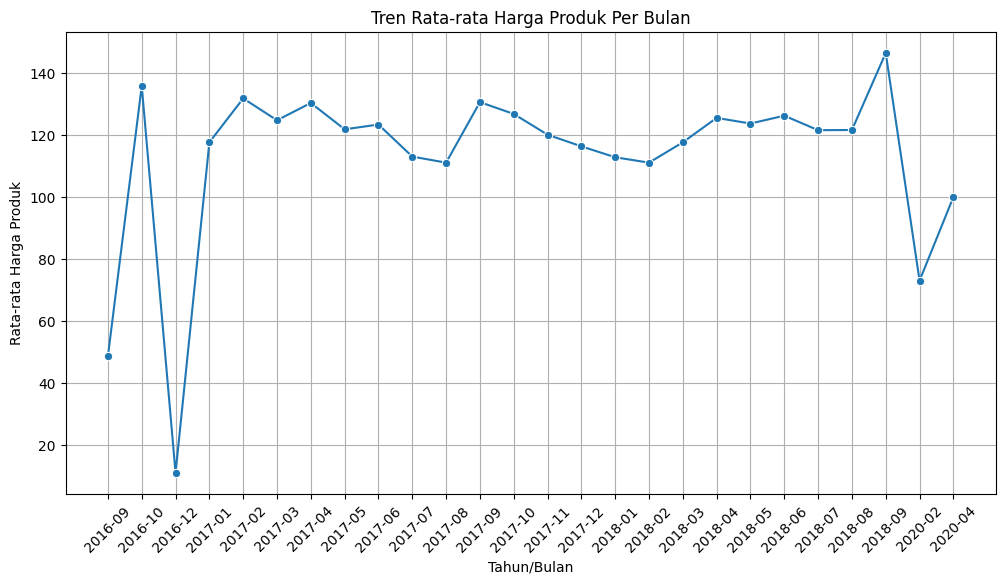

In [44]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=price_trend, x="year_month", y="price", marker="o", linestyle="-")
plt.xlabel("Tahun/Bulan")
plt.ylabel("Rata-rata Harga Produk")
plt.title("Tren Rata-rata Harga Produk Per Bulan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Insight : <br>
Berdasarkan analisis tren harga produk per bulan, ditemukan bahwa harga mengalami fluktuasi yang menunjukkan pola kenaikan dan penurunan yang tidak selalu konsisten setiap bulan. Namun, secara keseluruhan, harga menunjukkan tren meningkat dalam jangka panjang.

### Pertanyaan 3: <br>
Bagaimana distribusi score ulasan pelanggan, dan apa yang dapat disimpulkan tentang tingkat kepuasan keseluruhan?

In [45]:
# grouping berdasarkan review_score
df_review_score = df_review.groupby('review_score')['review_id'].count().sort_index(ascending=False)
df_review_score = df_review_score.rename('count')
df_review_score

review_score
5    57328
4    19142
3     8179
2     3151
1    11424
Name: count, dtype: int64

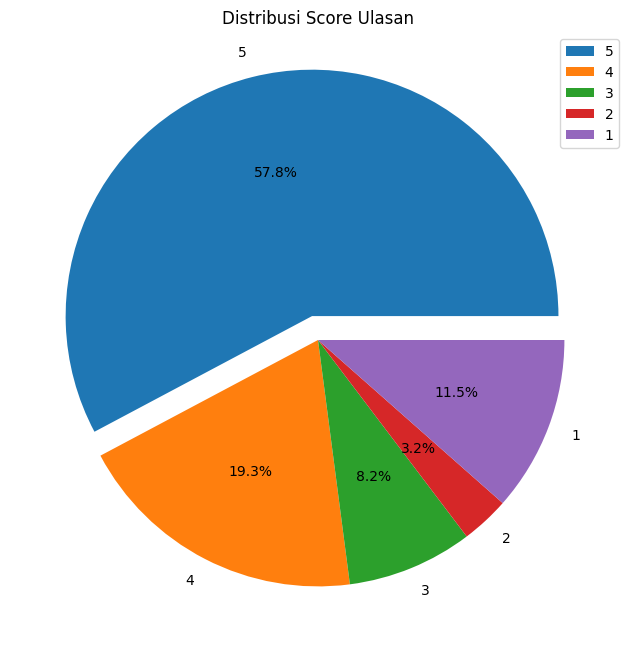

In [46]:
# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    df_review_score,
    labels=df_review_score.index,
    autopct='%1.1f%%',
    explode = (0.1, 0, 0, 0, 0),
)
plt.title('Distribusi Score Ulasan')
plt.legend()
plt.show()

Insight : <br>
Sebagian besar pelanggan (57.8%) menyatakan kepuasan yang tinggi terhadap produk yang dibeli, dibuktikan dengan pemberian skor review tertinggi (5) pada pie chart distribusi skor.

### Pertanyaan 4:
Bagaimana distribusi Status Pesanan, berapa persentase order dengan status delivered ?

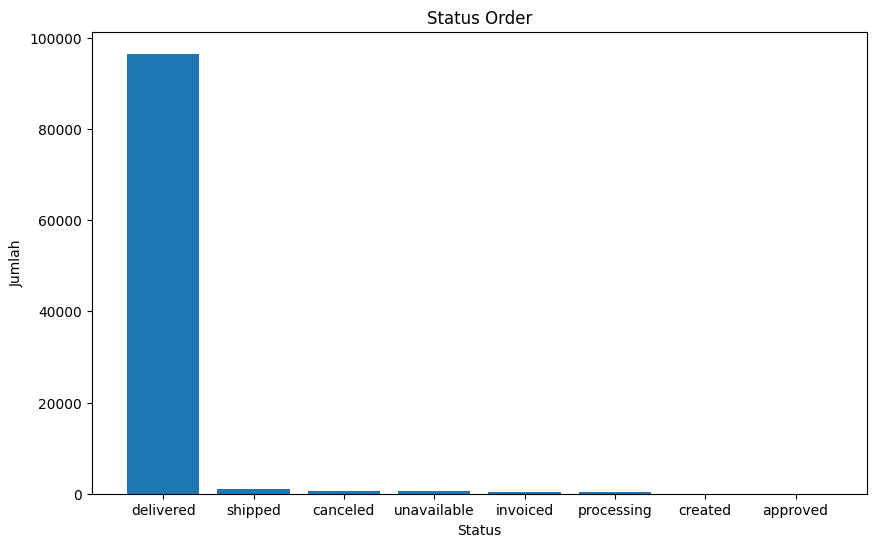

In [47]:
# Membuat diagram batang dengan df_order_status
plt.figure(figsize=(10, 6))
plt.bar(
  df_order_status['order_status'],
  df_order_status['count']
)
plt.title('Status Order')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()

In [48]:
# Mencari persentase setiap status order dalam satu list
df_order_status['persentase'] = df_order_status['count'] / df_order_status['count'].sum() * 100
df_order_status

,order_status,count,persentase
0,delivered,96478,97.020344
1,shipped,1107,1.113223
2,canceled,625,0.628513
3,unavailable,609,0.612423
4,invoiced,314,0.315765
5,processing,301,0.302692
6,created,5,0.005028
7,approved,2,0.002011


Insight : <br>
Sebagian besar pesanan (97,02%) berstatus 'delivered', dengan total 96.478 pesanan. Hal ini menunjukkan tingkat pemenuhan pesanan yang tinggi. Sebaliknya, status 'approved' mewakili sebagian kecil yang dapat diabaikan (0,002%), dengan hanya 2 pesanan yang termasuk dalam kategori ini. Hal ini menunjukkan bahwa pesanan biasanya bertransisi dengan cepat dari persetujuan ke tahap pemrosesan lebih lanjut."

### Pertanyaan 5: <br>
Pelanggan mana yang melakukan pembelian berulang, dan apakah pola ini menunjukkan loyalitas pelanggan di negara bagian tertentu ?

In [49]:
# Mendapatkan 10 id unik customer dengan jumlah pembelian terbanyak
df_customer_order = df_customer.groupby('customer_unique_id')['customer_id'].count().sort_values(ascending=False).head(10)
df_customer_order = df_customer_order.rename('count')
df_customer_order

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
12f5d6e1cbf93dafd9dcc19095df0b3d     6
de34b16117594161a6a89c50b289d35a     6
63cfc61cee11cbe306bff5857d00bfe4     6
f0e310a6839dce9de1638e0fe5ab282a     6
47c1a3033b8b77b3ab6e109eb4d5fdf3     6
Name: count, dtype: int64

In [50]:
# Menyimpan index top 10 customer dengan pembelian terbanyak
top_10_unique_ids = df_customer_order.sort_values(ascending=False).head(10).index

# Mendapatkan states dimana 10 customer tersebut berasal
top_10_states = df_customer[df_customer['customer_unique_id'].isin(top_10_unique_ids)][['customer_unique_id','customer_state']].drop_duplicates().reset_index(drop=True)
top_10_states.set_index('customer_unique_id', inplace=True)
top_10_states = top_10_states.reindex(df_customer_order.index) # Mengubah urutan index agar sama dengan df_customer_order

# Menampilkan
print(top_10_states['customer_state'].value_counts())
print()
top_10_states

customer_state
SP    5
PE    1
MG    1
PR    1
RJ    1
ES    1
Name: count, dtype: int64



,customer_state
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,SP
3e43e6105506432c953e165fb2acf44c,SP
6469f99c1f9dfae7733b25662e7f1782,SP
ca77025e7201e3b30c44b472ff346268,PE
1b6c7548a2a1f9037c1fd3ddfed95f33,MG
12f5d6e1cbf93dafd9dcc19095df0b3d,PR
de34b16117594161a6a89c50b289d35a,SP
63cfc61cee11cbe306bff5857d00bfe4,RJ
f0e310a6839dce9de1638e0fe5ab282a,ES


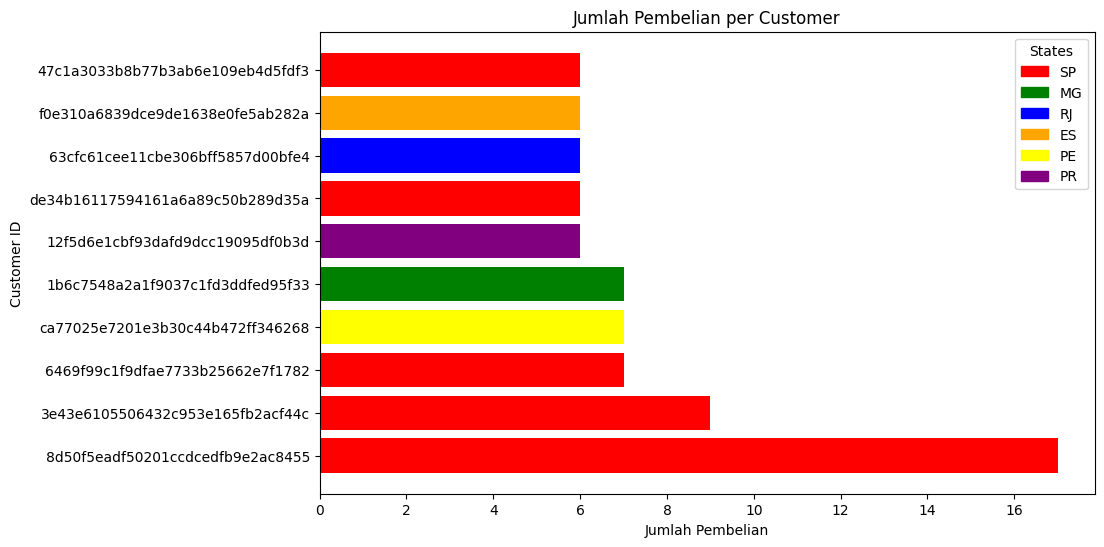

In [51]:
# Deklarasi untuk warna
state_colors = {
    'SP': 'red',
    'MG': 'green',
    'RJ': 'blue',
    'ES': 'orange',
    'PE': 'yellow',
    'PR': 'purple'
}

customer_colors = [state_colors.get(state) for state in top_10_states['customer_state']]
legend_handles = [mpatches.Patch(color=color, label=state) for state, color in state_colors.items()]

# Membuat diagram batang horizontal
plt.figure(figsize=(10, 6))
plt.barh(
    top_10_unique_ids,
    df_customer_order.values,
    color=customer_colors[:10]
)
plt.title('Jumlah Pembelian per Customer')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Customer ID')
plt.legend(handles=legend_handles, title='States')
plt.show()

Insight : <br>
Loyalitas pelanggan terlihat jelas di Sao Paulo, dengan sebagian besar pembeli yang sering bertransaksi berasal dari negara bagian ini. Terutama, pelanggan dengan total pembelian tertinggi (17 pembelian) berasal dari Sao Paulo. Selain itu, 4 dari 10 pelanggan teratas dengan pembelian terbanyak juga berlokasi di Sao Paulo. Konsentrasi pelanggan tetap di Sao Paulo ini menunjukkan basis pelanggan yang kuat dan potensi loyalitas merek di wilayah tersebut.

### Pertanyaan 6: <br>
Berapa proporsi ulasan positif, negatif, dan netral dari total ulasan?

In [53]:
from textblob import TextBlob
# Tambahkan kolom baru 'sentiment' untuk menyimpan hasil analisis sentimen
df_review['sentiment'] = df_review['review_comment_message'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Klasifikasikan ulasan berdasarkan nilai polarity
df_review['sentiment_category'] = df_review['sentiment'].apply(lambda polarity:
                                                                'positif' if polarity > 0
                                                                else ('negatif' if polarity < 0
                                                                        else 'netral'))

# Tampilkan ulasan positif
print("Ulasan Positif:")
print(df_review[df_review['sentiment_category'] == 'positif']['review_comment_message'].head())  # Menampilkan 5 ulasan positif teratas

# Tampilkan ulasan negatif
print("\nUlasan Negatif:")
print(df_review[df_review['sentiment_category'] == 'negatif']['review_comment_message'].head())  # Menampilkan 5 ulasan negatif teratas

total_reviews = len(df_review)
positive_reviews = len(df_review[df_review['sentiment_category'] == 'positif'])
negative_reviews = len(df_review[df_review['sentiment_category'] == 'negatif'])
neutral_reviews = len(df_review[df_review['sentiment_category'] == 'netral'])

print()
print(f"Proporsi ulasan positif: {positive_reviews / total_reviews:.2%}")
print(f"Proporsi ulasan negatif: {negative_reviews / total_reviews:.2%}")
print(f"Proporsi ulasan netral: {neutral_reviews / total_reviews:.2%}")

Ulasan Positif:
15     Vendedor confiável, produto ok e entrega antes...
32     Sempre compro pela Internet e a entrega ocorre...
38     Tô completamente apaixonada, loja super respon...
90                                         Super rápido.
108                                         OK RECOMENDO
Name: review_comment_message, dtype: object

Ulasan Negatif:
459     Houve alguma confusão entre vendedor e o stark...
555                       Nem ratrear estou conseguindo:(
570     prazo foi estendido,porém entregue no prazo di...
929     Na propaganda está escrito Mixer elétrico e ve...
1017    Loja sem vergonha. Não entregaram o pedido e t...
Name: review_comment_message, dtype: object

Proporsi ulasan positif: 3.07%
Proporsi ulasan negatif: 0.46%
Proporsi ulasan netral: 96.47%


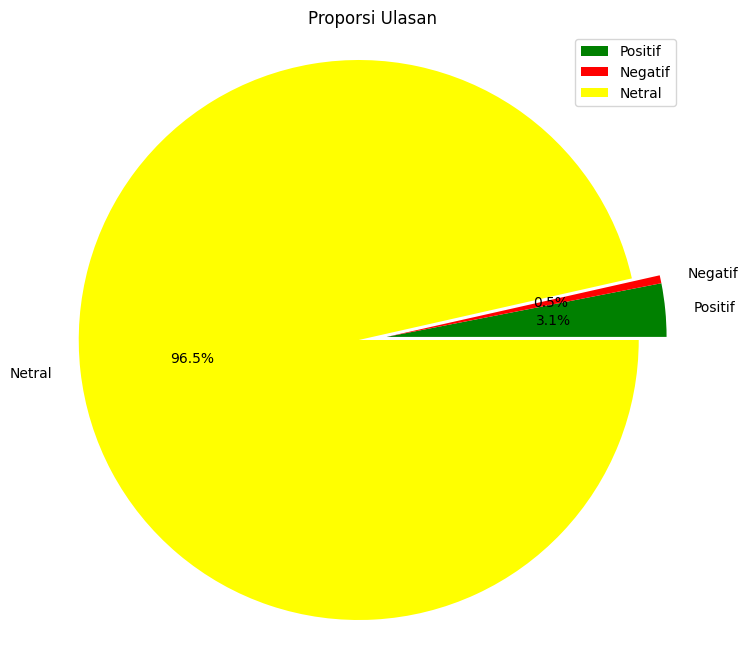

In [54]:
# Plotting pie chart
labels = ['Positif', 'Negatif', 'Netral']
sizes = [positive_reviews, negative_reviews, neutral_reviews]
colors = ['green', 'red', 'yellow']

plt.figure(figsize=(8, 8))
plt.pie(
  sizes,
  labels=labels,
  colors=colors,
  explode = (0,0,0.1),
  autopct='%1.1f%%'
)

plt.title('Proporsi Ulasan')
plt.axis('equal')
plt.legend()
plt.show()

Insight : <br>
Sebagian besar ulasan (96.47%) bersifat netral. Ini menunjukkan bahwa mayoritas pelanggan tidak memberikan komentar atau umpan balik yang ekspresif, baik positif maupun negatif. Kemungkinan besar, mereka puas dengan produk atau layanan, tetapi tidak merasa perlu untuk memberikan pujian secara khusus.

- Conclusion pertanyaan 1 <br>
Analisis heatmap menunjukkan bahwa fokus utama pasar berada di wilayah tenggara Brasil, dengan konsentrasi pembeli tertinggi di Sao Paulo dan Rio de Janeiro. Namun, adanya pelanggan dari Portugal, Mexico, dan Filipina mengindikasikan potensi pasar internasional yang signifikan.

- Conclusion Pertanyaan 2 <br>
Secara keseluruhan, analisis tren harga per bulan menunjukkan adanya fluktuasi dengan pola kenaikan dan penurunan yang tidak selalu konsisten. Namun, dalam jangka panjang, harga cenderung mengalami peningkatan, mengindikasikan adanya tren naik secara keseluruhan.

- Conclusion Pertanyaan 3 <br>
Secara keseluruhan, dapat disimpulkan bahwa produk yang dijual memiliki tingkat kepuasan pelanggan yang tinggi. Hal ini ditunjukkan dengan dominasi skor review 5 yang diberikan oleh mayoritas pelanggan (57.8%). Tingkat kepuasan ini mengindikasikan keberhasilan produk dalam memenuhi harapan dan kebutuhan pelanggan, serta berpotensi meningkatkan loyalitas dan brand image positif."

- Conclusion Pertanyaan 4 <br>
Tingkat pemenuhan pesanan yang tinggi, mencapai 97,02%, menunjukkan efisiensi dan keandalan sistem operasional dalam memproses dan mengirimkan pesanan. Transisi cepat dari status 'approved' ke tahap selanjutnya juga mencerminkan proses yang lancar dan minim hambatan.

- Conclusion Pertanyaan 5 <br>
Tingginya frekuensi pembelian dan konsentrasi pelanggan tetap di Sao Paulo menunjukkan loyalitas yang kuat. Hal ini dapat disebabkan oleh beberapa faktor seperti kepuasan pelanggan terhadap produk atau layanan, pengalaman berbelanja yang positif, program loyalitas yang efektif, atau faktor lainnya yang membuat pelanggan di Sao Paulo cenderung untuk berbelanja berulang kali.

- Conclusion Pertanyaan 6 <br>
Tingginya proporsi ulasan netral (96.47%) mengindikasikan bahwa mayoritas pelanggan memiliki pengalaman berbelanja yang cukup memuaskan. Mereka mungkin puas dengan produk atau layanan yang diterima, tetapi tidak memiliki dorongan yang kuat untuk memberikan pujian atau kritik secara eksplisit.
